In [1]:
from solartwins import *

In [2]:
from tqdm import tqdm
import numpy as np
import pandas as pd
from scipy import stats
from pandas import DataFrame

In [3]:
table= t.copy()

table.remove_column('O')
table.remove_column('C')

elements =[]
elnames = table.columns[3:64]
for n in elnames:
    if len(n) < 3 :
        elements.append(n)

atomic_number = [26, 11, 12, 13, 14, 16, 20, 23, 25, 27, 28, 29, 30, 38, 
                39, 40, 56, 57, 58, 59, 60, 62, 63, 64, 66, 22, 21, 24]

element_names = ['Iron', 'Sodium', 'Magnesium', 'Aluminum', 'Silicon', 'Sulfur', 'Calcium', 'Vanadium', 'Manganese', 
    'Cobalt', 'Nickel', 'Copper', 'Zinc', 'Strontium', 'Yttrium', 'Zirconium', 'Barium', 'Lanthanum ', 'Cesium', 
    'Praseodymium', 'Neodymium', 'Samarium', 'Europium', 'Gadolinium', 'Dysprosium', 'Titanium', 'Scandium']

In [ ]:
con_temp_shuffle = []
for n in elements:
    con_temp_shuffle.append(tc_map[n]) 
   
stdevs = np.zeros((1000,28))
for i in tqdm(range(1000)):
    np.random.shuffle(con_temp_shuffle)
    all_residu = np.zeros((len(t['star_name']),28))
    
    for j,ob in enumerate(t['star_name']):
        abund = np.array(star_table(ob)['Abundance'])
        con_temp_shuff = np.array(con_temp_shuffle)
        error = np.array(star_table(ob)['Abundance Error'])
        all_residu[j,:] = residuals(con_temp_shuff, abund, error)

    for index, element in tqdm(enumerate(elements)):
        stdevs[i,index] = np.std(all_residu[:,index])

  0%|          | 0/1000 [00:00<?, ?it/s]
0it [00:00, ?it/s]
  0%|          | 1/1000 [00:01<19:37,  1.18s/it]
0it [00:00, ?it/s]
  0%|          | 2/1000 [00:02<19:36,  1.18s/it]
0it [00:00, ?it/s]
  0%|          | 3/1000 [00:03<20:21,  1.23s/it]
0it [00:00, ?it/s]
  0%|          | 4/1000 [00:04<19:40,  1.18s/it]
0it [00:00, ?it/s]
  0%|          | 5/1000 [00:06<19:54,  1.20s/it]
0it [00:00, ?it/s]
  1%|          | 6/1000 [00:07<19:59,  1.21s/it]
0it [00:00, ?it/s]
  1%|          | 7/1000 [00:08<20:24,  1.23s/it]
0it [00:00, ?it/s]
  1%|          | 8/1000 [00:09<20:27,  1.24s/it]
0it [00:00, ?it/s]
  1%|          | 9/1000 [00:11<20:36,  1.25s/it]
0it [00:00, ?it/s]
  1%|          | 10/1000 [00:12<19:46,  1.20s/it]
0it [00:00, ?it/s]
  1%|          | 11/1000 [00:13<19:23,  1.18s/it]
0it [00:00, ?it/s]
  1%|          | 12/1000 [00:14<18:58,  1.15s/it]
0it [00:00, ?it/s]
  1%|▏         | 13/1000 [00:15<18:44,  1.14s/it]
0it [00:00, ?it/s]
  1%|▏         | 14/1000 [00:16<18:19,  1.12s/it]
0i

In [ ]:
stdev_differences = {} 
for ind, e in tqdm(enumerate(elements)): 
    stdev_differences['difference' + e] = []
    for index, each in enumerate(stdevs[:,ind]):
        diff = beforetc[ind] - (stdevs[index, ind])
        stdev_differences['difference'+ e].append(diff)

names = {}
atomic = {}
stdev_true = {}
for k, v in enumerate(elements):
    names[v] = [v] * 1000
    atomic[v] = [atomic_number[k]] * 1000
    stdev_true[v] = [beforetc[k]] * 1000

In [4]:
l = 1
for key, value in enumerate(elements):
    while l > 0: 
        ViData = {'Element' : names[value] , 'Atomic Number': atomic[value], 'StDev': stdev_true[value], 
        'StDev, Tc Removed': stdevs[:,key], 'Difference': stdev_differences['difference'+ value]}

        Fi = DataFrame (ViData, columns = ['Element','Atomic Number', 'StDev', 'StDev, Tc Removed', 'Difference'])
        
        
        fig = px.violin(Fi, y="Difference", x="Element", color="Atomic Number", box=True, points="all",
                        hover_name=None, hover_data=None, animation_frame=None, animation_group=None)
        
        fig.show()
        plt.savefig(value + 'Vio.png')
        l= l-1

NameError: name 'names' is not defined

<class 'numpy.ndarray'>
<class 'list'>


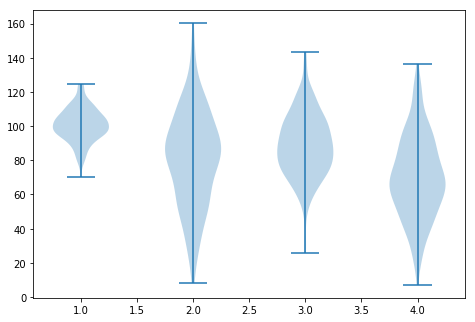

In [5]:
import matplotlib.pyplot as plt

np.random.seed(10)
collectn_1 = np.random.normal(100, 10, 200)
collectn_2 = np.random.normal(80, 30, 200)
collectn_3 = np.random.normal(90, 20, 200)
collectn_4 = np.random.normal(70, 25, 200)

print(type(collectn_1))
## combine these different collections into a list
data_to_plot = [collectn_1, collectn_2, collectn_3, collectn_4]
print(type(data_to_plot))

# Create a figure instance
fig = plt.figure()

# Create an axes instance
ax = fig.add_axes([0,0,1,1])

# Create the boxplot
bp = ax.violinplot(data_to_plot)
plt.show()

In [6]:
import matplotlib.pyplot as plt

data = np.list(dataplotting)

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

bp = ax.violinplot(data_to_plot)
plt.show()

AttributeError: module 'numpy' has no attribute 'list'